**<center><h1>Hough Transform for Line and Circle Detection in Images</h1></center>**

In this notebook, we explore the application of the Hough Transform, a powerful image processing technique used for detecting simple shapes such as lines and circles in digital images. The Hough Transform is particularly useful in computer vision tasks where identifying geometric structures is essential.

### **Table of Contents**

* [Section 1. Install Libraries](#section-one)
* [Section 2. Hough Transform for Lines Detection](#section-two)
* [Section 3. Hough Transform for Circles Detection](#section-three)
* [Section 4. Conclusion](#section-four)

## **Step 1. Import Libraries** <a id="section-one"></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## **Step 2. Hough Transform for Lines Detection** <a id="section-two"></a>

In [2]:
def hough_trns_line_detection(img_path):
    # Read image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the edges in the image using Canny detector
    edges = cv2.Canny(gray, 50, 200)

    # Detect points that form a line1
    lines = cv2.HoughLinesP(edges, # Input edge image : Input image should be a binary image, so apply threshold edge detection before finding applying hough transform
                            1, # Distance resolution in pixels
                            np.pi/180, # Angle resolution in radians
                            threshold = 68, # Min number of votes for valid line : minimum vote it should get for it to be considered as a line
                            minLineLength=15, # Min allowed length of line
                            maxLineGap=250 # Max allowed gap between line for joining them
                           )

    # Draw lines on the image
    img_with_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 3)

    # Convert BGR images to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    img_with_lines_rgb = cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB)

    # Display the images using matplotlib
    plt.figure(figsize=(20, 10))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Display image with edges
    plt.subplot(1, 3, 2)
    plt.imshow(edges_rgb)
    plt.title("Canny Edges")
    plt.axis('off')

    # Display image with detected lines
    plt.subplot(1, 3, 3)
    plt.imshow(img_with_lines_rgb)
    plt.title("Lines Detection using Hough Transform")
    plt.axis('off')

    plt.show()

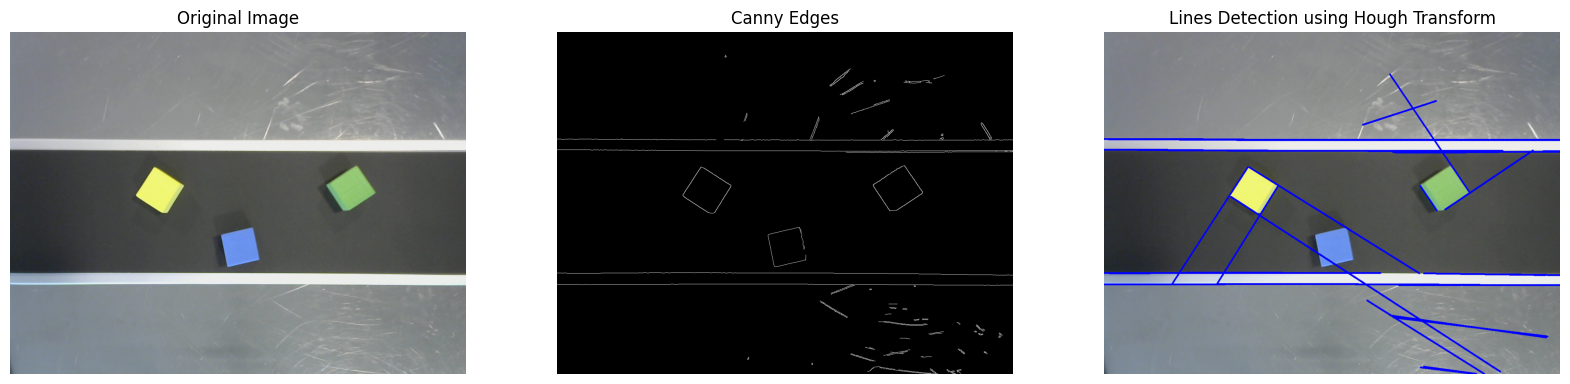

In [3]:
hough_trns_line_detection("/kaggle/input/cubes-on-conveyor-belt/training/cubes.jpg.23im6ffe.ingestion-6797d84bf-mrdk8.jpg.412337ra.ingestion-64f85c558f-hhhcz.jpg")

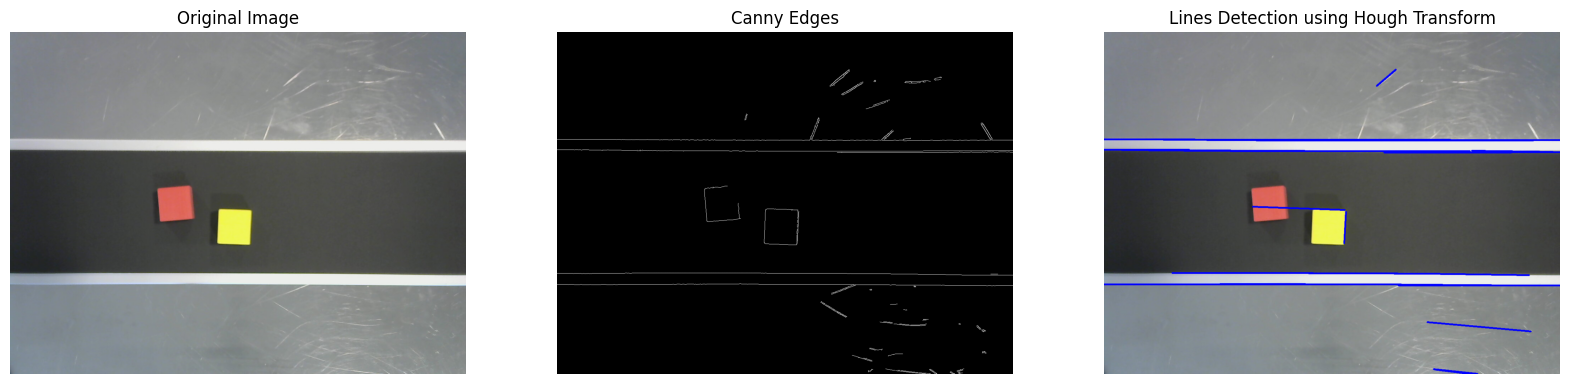

In [4]:
hough_trns_line_detection("/kaggle/input/cubes-on-conveyor-belt/testing/cubes.jpg.23in4q12.ingestion-6797d84bf-mkqlt.jpg.41237tnf.ingestion-64f85c558f-g9zf2.jpg")

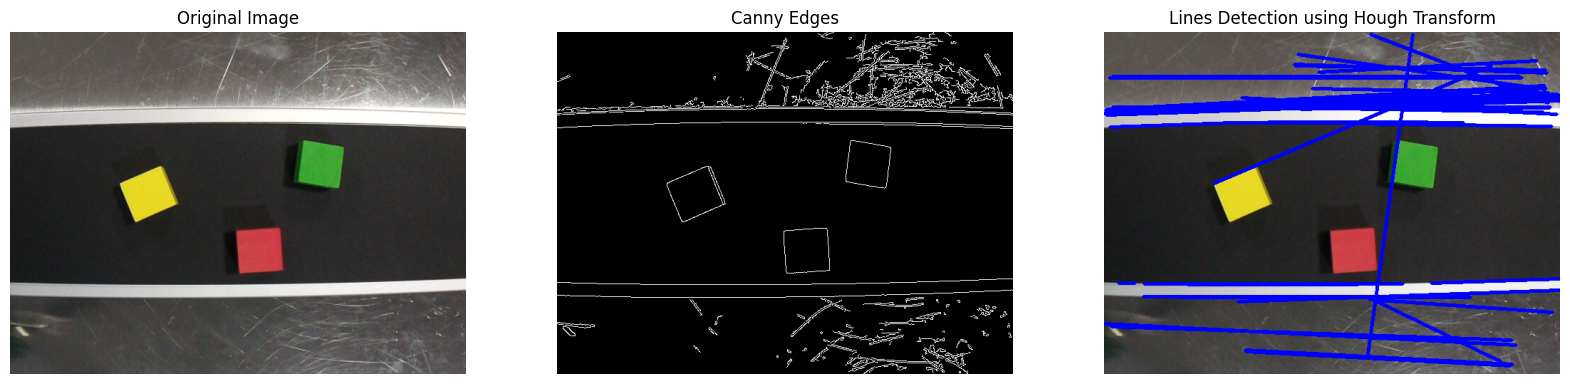

In [5]:
hough_trns_line_detection("/kaggle/input/cubes-on-conveyor-belt/testing/cubes.jpg.23j3rclu.ingestion-6645fc556f-fjlf7.jpg.41237tqg.ingestion-64f85c558f-g9zf2.jpg")

## **Step 3. Hough Transform for Circles Detection** <a id="section-three"></a>

In [6]:
def hough_trns_circle_detection(img_path, min_radius_chosen, max_radius_chosen):
    # Read image as gray-scale
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image to reduce noise
    img_blur = cv2.medianBlur(gray, 5)
    #img_to_canny = img_blur.copy()
    # Apply hough transform on the image
    img_to_canny = cv2.Canny(img_blur, 50, 200)
    circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 40, param1=100, param2=30, minRadius=min_radius_chosen, maxRadius=max_radius_chosen)
    img_with_circles = img.copy()
    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw outer circle 
            cv2.circle(img_with_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw inner circle
            cv2.circle(img_with_circles, (i[0], i[1]), 2, (0, 0, 255), 5)
    # display result
    plt.figure(figsize=(20, 10))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    # Display original image
    plt.subplot(1, 3, 2)
    plt.imshow(img_to_canny)
    plt.title("Canny Edge")
    plt.axis('off')

    # Display image with detected circles
    plt.subplot(1, 3, 3)
    plt.imshow(img_with_circles)
    plt.title("Circles Detection using Hough Transform")
    plt.axis('off')

    plt.show()

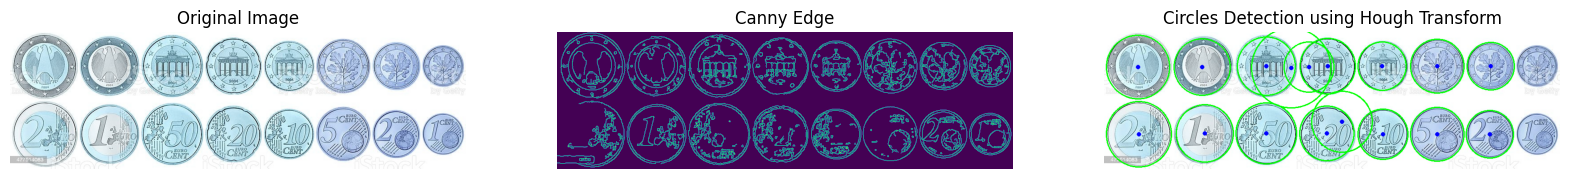

In [7]:
hough_trns_circle_detection("/kaggle/input/count-coins-image-dataset/coins_images/coins_images/euro_coins/174dd15a12.jpg", 50, 100)

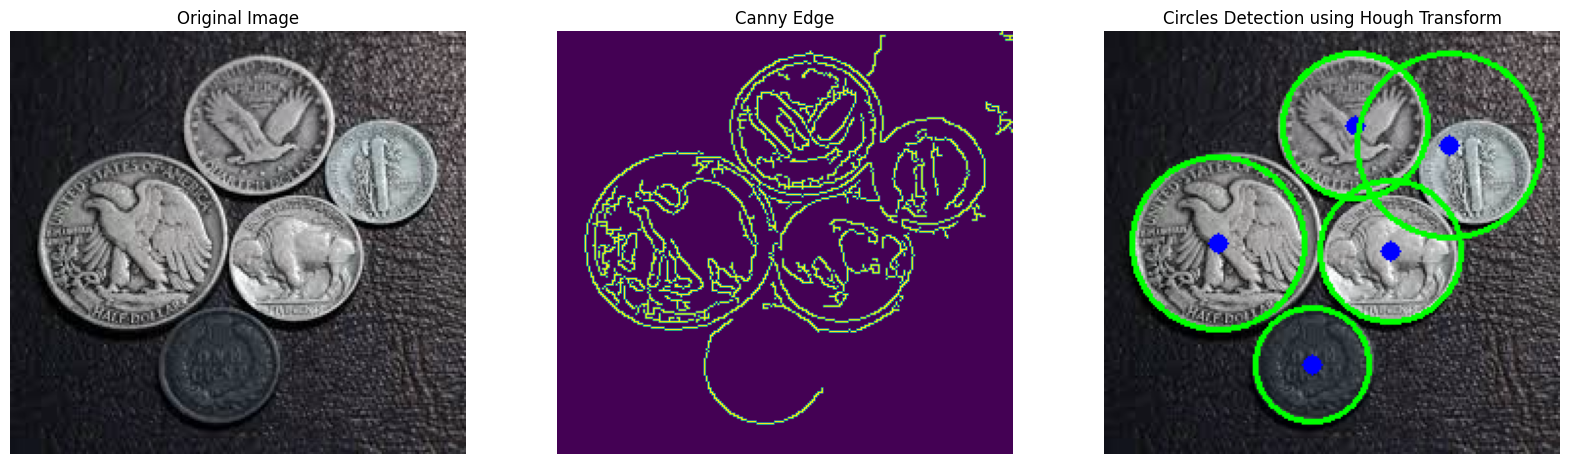

In [8]:
hough_trns_circle_detection("/kaggle/input/count-coins-image-dataset/coins_images/coins_images/us_coins/06884cc891.jpg", 5, 60)

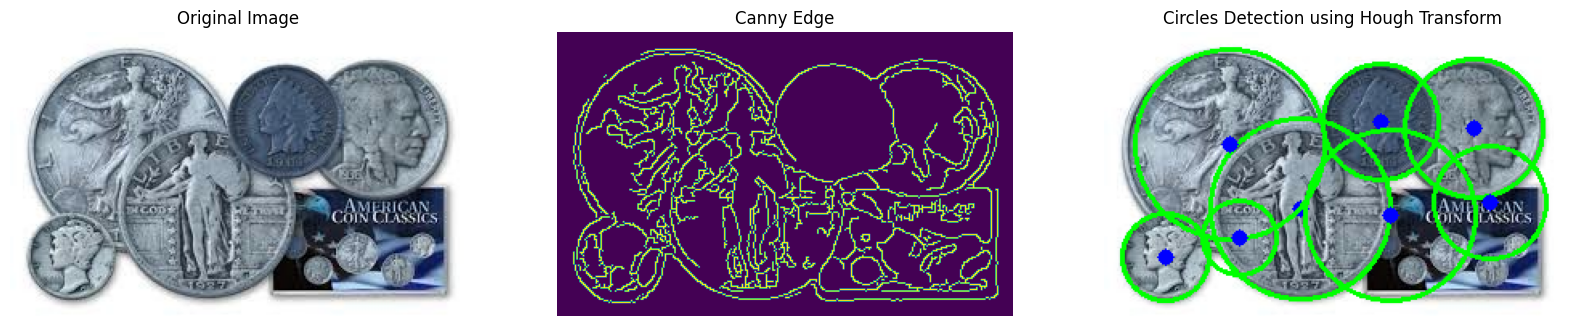

In [9]:
hough_trns_circle_detection("/kaggle/input/count-coins-image-dataset/coins_images/coins_images/us_coins/1015a90947.jpg", 20, 60)

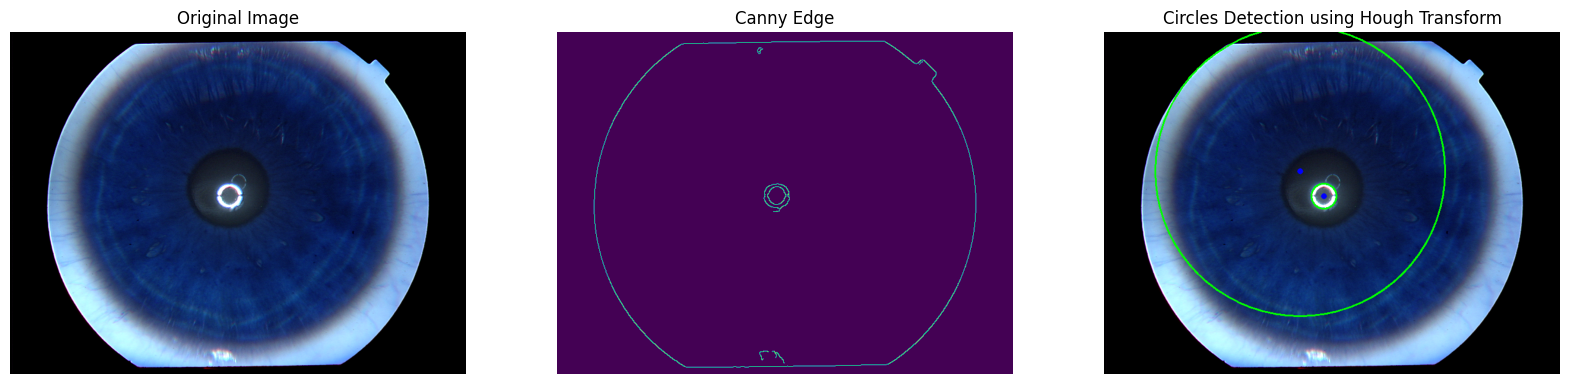

In [10]:
hough_trns_circle_detection("/kaggle/input/iris-images/iris_images/iris1_8/left/001L_2.png", 5, 300)

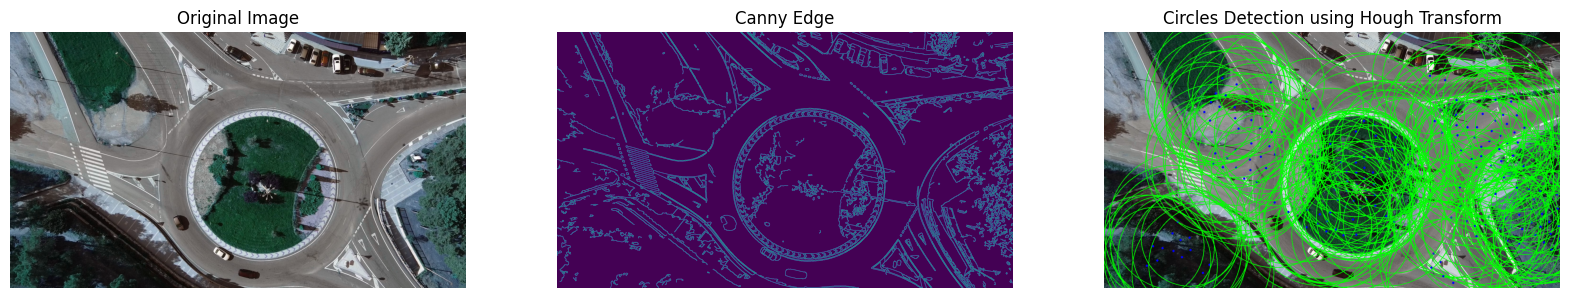

In [11]:
hough_trns_circle_detection("/kaggle/input/roundabout-aerial-images-for-vehicle-detection/original/original/imgs/00001_frame000003_original.jpg", 200, 300)

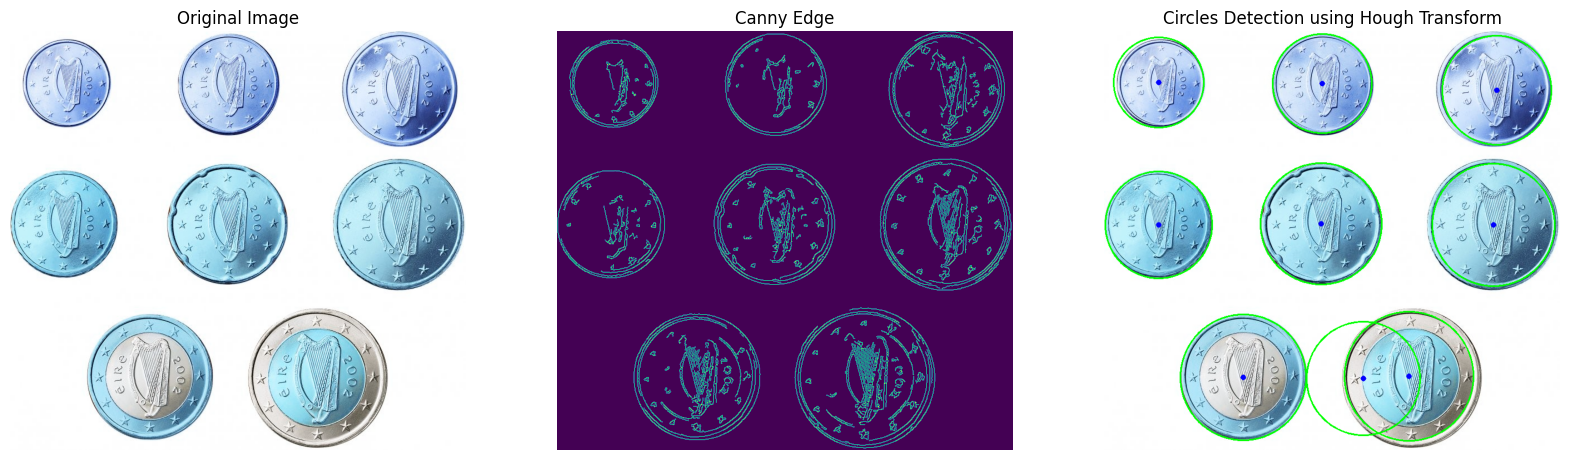

In [12]:
hough_trns_circle_detection("/kaggle/input/count-coins-image-dataset/coins_images/coins_images/euro_coins/0449a7f119.jpg", 80, 120)

## **Step 4. Conclusion** <a id="section-four"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Roboto;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
              In this notebook, we tested the Hough Transform for detecting circles and lines. The detection quality heavily depends on tuning parameters like maximum and minimum radius. Each image requires adjusting these parameters for the best results, highlighting the need for flexibility and iterative refinement to achieve accurate detections.
</p>
</div>
